In [19]:
%matplotlib inline
from pathlib import Path
import random
import statistics
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f, f_oneway
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt



In [4]:
df= pd.read_excel('/content/Exp Data 4 (1).xlsx')

In [5]:
df.head()

,User_id,UX Design,Sales in first 30 days,Time Spent on App in first 30 days,Did Subscribe In 30 days?,Retained After First 7 days (between 8 to 30 days of Signup)?
0,1181,New,168.0,149,No,Yes
1,1182,Old,84.0,123,No,No
2,1183,New,126.0,139,No,No
3,1184,Old,157.5,132,No,No
4,1185,New,168.0,109,No,No


F test for sale

In [6]:
# Separate the data based on UX Design
new_design_sale = df[df['UX Design'] == 'New']['Sales in first 30 days']
old_design_sale = df[df['UX Design'] == 'Old']['Sales in first 30 days']
# Calculate the varience
var_new_sale=new_design_sale.var()
var_old_sale=old_design_sale.var()

In [7]:
# Calculate f stat

f_stat_sale = var_new_sale/var_old_sale if var_new_sale>var_old_sale else var_old_sale/ var_new_sale

# Degree of freedom
df_new_sales= len(new_design_sale)-1
df_old_sales= len(old_design_sale)-1

# p value calculation
p_value_sale= 1-f.cdf(f_stat_sale,df_new_sales,df_old_sales) if var_new_sale>var_old_sale else 1-f.cdf(f_stat_sale,df_old_sales,df_new_sales)
# f critical at 95% confidence level
f_critical_sale = f.ppf(0.95,df_new_sales,df_old_sales ) if var_new_sale>var_old_sale else f.ppf(0.95,df_old_sales,df_new_sales)
f_stat_sale, f_critical_sale, p_value_sale


(2.108854538732643, 1.0329714243334345, 1.1102230246251565e-16)

F test for time spent on App

In [8]:
# Separate the data based on UX Design
new_design_TS = df[df['UX Design'] == 'New']['Time Spent on App in first 30 days']
old_design_TS = df[df['UX Design'] == 'Old']['Time Spent on App in first 30 days']
# Calculate the varience
var_new_TS=new_design_TS.var()
var_old_TS=old_design_TS.var()

# Calculate f stat

f_stat_ts = var_new_TS/var_old_TS if var_new_TS>var_old_TS else var_old_TS/ var_new_TS

# Degree of freedom
df_new_TS= len(new_design_TS)-1
df_old_TS= len(old_design_TS)-1

# p value calculation
p_value_ts= 1-f.cdf(f_stat_ts,df_new_TS,df_old_TS) if var_new_TS>var_old_sale else 1-f.cdf(f_stat_ts,df_old_TS,df_new_TS)

# f critical at 95% confidence level
f_critical_ts = f.ppf(0.95,df_new_TS,df_old_TS ) if var_new_TS>df_old_TS else f.ppf(0.95,df_old_TS,df_new_TS)
print("F-statistics is: ",f_stat_ts,"F-Critical is: ", f_critical_ts, "P-value is: ",p_value_ts)

F-statistics is:  1.0622698579831038 F-Critical is:  1.032944010679504 P-value is:  0.0010976245045789534


T test

In [9]:
# t-Test for Time spent on Apps assuming unequal varience from F-test result
s1= df[df['UX Design']=='New']['Time Spent on App in first 30 days']
s2= df[df['UX Design']=='Old']['Time Spent on App in first 30 days']
res_timespent = stats.ttest_ind(s1,s2,
                      equal_var=False)
print(f'p-value for two sided test: {res_timespent.pvalue / 2:.4f}')

p-value for two sided test: 0.0000


In [10]:
# t-Test for sales assuming unequal varience from F-test result
s3= df[df['UX Design']=='New']['Sales in first 30 days']
s4= df[df['UX Design']=='Old']['Sales in first 30 days']
res_sales = stats.ttest_ind(s3,s4,
                      equal_var=False)
print(f'p-value for two sided test: {res_sales.pvalue / 2:.4f}')

p-value for two sided test: 0.0000


In [11]:
print(f" For sales:", res_sales)
print(f" For Time spent:", res_timespent)


 For sales: TtestResult(statistic=78.46128933659472, pvalue=0.0, df=19177.735718016662)
 For Time spent: TtestResult(statistic=-39.36471193732134, pvalue=0.0, df=20346.148904219317)


In [12]:
# filter the data  to create New design and Old design
n_design = df.loc[df['UX Design'] == 'New'].copy()
o_design = df.loc[df['UX Design'] == 'Old'].copy()

n_design = n_design.dropna(subset=['Sales in first 30 days'])
o_design = o_design.dropna(subset=['Sales in first 30 days'])

n_design = n_design.dropna(subset=['Time Spent on App in first 30 days'])
o_design = o_design.dropna(subset=['Time Spent on App in first 30 days'])

def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (x.mean() - y.mean()) / sqrt(((nx-1)*x.var() + (ny-1)*y.var()) / dof)

effect_size_sales = cohen_d(n_design['Sales in first 30 days'], o_design['Sales in first 30 days'])
effect_size_time = cohen_d(n_design['Time Spent on App in first 30 days'], o_design['Time Spent on App in first 30 days'])

# Calculate degrees of freedom for each metric
dof_sales = len(n_design['Sales in first 30 days']) + len(o_design['Sales in first 30 days']) - 2
dof_time = len(n_design['Time Spent on App in first 30 days']) + len(o_design['Time Spent on App in first 30 days']) - 2

# Critical t-values for 95% confidence for each metric
critical_t_sales = stats.t.ppf(1 - 0.025, dof_sales)  # two-tailed for sales
critical_t_time = stats.t.ppf(1 - 0.025, dof_time)  # two-tailed for time

print(f"effect size for Sales is :", effect_size_sales)
print(f"effect size for Time Spent is :", effect_size_time)
print(f"Critical t-value for Sales is:", critical_t_sales)
print(f"Critical t-value for Time Spent is:", critical_t_time)

effect size for Sales is : 1.0767739541420576
effect size for Time Spent is : -0.5494033718224477
Critical t-value for Sales is: 1.960079004809524
Critical t-value for Time Spent is: 1.960079004809524


In [13]:

# Define a function to calculate the confidence interval
def compute_confidence_interval(n1, m1, std1, n2, m2, std2):
    # Calculate the pooled standard deviation (for equal variances)
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    # Calculate the standard error of the difference in means
    se_diff = pooled_std * np.sqrt(1/n1 + 1/n2)
    # Calculate the t critical value for 95% CI
    dof = n1 + n2 - 2
    t_crit = stats.t.ppf(1 - 0.025, dof)  # 95% CI, two-tailed
    # Calculate the confidence interval
    ci_lower = (m1 - m2) - t_crit * se_diff
    ci_upper = (m1 - m2) + t_crit * se_diff
    return ci_lower, ci_upper

# Calculate the sample sizes, means and standard deviations for each metric
c_sales_new = n_design['Sales in first 30 days'].count()
m_sales_new = n_design['Sales in first 30 days'].mean()
std_sales_new = n_design['Sales in first 30 days'].std()

c_sales_old = o_design['Sales in first 30 days'].count()
m_sales_old = o_design['Sales in first 30 days'].mean()
std_sales_old = o_design['Sales in first 30 days'].std()

c_time_new = n_design['Time Spent on App in first 30 days'].count()
m_time_new = n_design['Time Spent on App in first 30 days'].mean()
std_time_new = n_design['Time Spent on App in first 30 days'].std()

c_time_old = o_design['Time Spent on App in first 30 days'].count()
m_time_old = o_design['Time Spent on App in first 30 days'].mean()
std_time_old = o_design['Time Spent on App in first 30 days'].std()

# Calculate the confidence intervals
ci_sales = compute_confidence_interval(c_sales_new, m_sales_new, std_sales_new, c_sales_old, m_sales_old, std_sales_old)
ci_time = compute_confidence_interval(c_time_new, m_time_new, std_time_new, c_time_old, m_time_old, std_time_old)

print(f"95% Confidence interval for Sales LB and UB:", ci_sales)
print(f"95% Confidence interval for Time Spent LB and UB:", ci_time)

95% Confidence interval for Sales LB and UB: (25.83046556652122, 27.17535297260772)
95% Confidence interval for Time Spent LB and UB: (-13.799089481476653, -12.491716507146396)


Reporting the final result

In [14]:
# results
print(f"F-stat sale =",f_stat_sale)
print(f"F test p value for sales =", p_value_sale)
print(f"F Critical for sales =",f_critical_sale)
print(f"F-stat time spent =", f_stat_ts)
print(f"F test p value for time spent =",p_value_ts)
print(f"F Critical for time spent =", f_critical_ts)
print(f"T test result for sales =", res_sales)
print(f"T test result for time spent =", res_timespent)
print(f"effect size for sales =",effect_size_sales)
print(f"effect size for time spent =",effect_size_time)
print(f"T critical for sales =",critical_t_sales)
print(f"T critical for time spent =",critical_t_time)
print(f"Confidence interval for sale LB and UB =",ci_sales)
print(f"Confidence interval for time spent LB and UB =",ci_time)


F-stat sale = 2.108854538732643
F test p value for sales = 1.1102230246251565e-16
F Critical for sales = 1.0329714243334345
F-stat time spent = 1.0622698579831038
F test p value for time spent = 0.0010976245045789534
F Critical for time spent = 1.032944010679504
T test result for sales = TtestResult(statistic=78.46128933659472, pvalue=0.0, df=19177.735718016662)
T test result for time spent = TtestResult(statistic=-39.36471193732134, pvalue=0.0, df=20346.148904219317)
effect size for sales = 1.0767739541420576
effect size for time spent = -0.5494033718224477
T critical for sales = 1.960079004809524
T critical for time spent = 1.960079004809524
Confidence interval for sale LB and UB = (25.83046556652122, 27.17535297260772)
Confidence interval for time spent LB and UB = (-13.799089481476653, -12.491716507146396)


In [15]:
# Decision
#P value for t test on sale and time spent on app are 0.
pvaluesales=0.00
pvaluetimespent=0.00
#from above result
alpha= 0.05

if pvaluesales < alpha:
    print("\nReject the null hypothesis for Sales: There is a significant difference between the old and new designs.")
else:
    print("\nAccept the null hypothesis for Sales: There is no significant difference between the old and new designs.")

if pvaluetimespent < alpha:
    print("Reject the null hypothesis for Time Spent: There is a significant difference between the old and new designs.")
else:
    print("Accept the null hypothesis for Time Spent: There is no significant difference between the old and new designs.")


Reject the null hypothesis for Sales: There is a significant difference between the old and new designs.
Reject the null hypothesis for Time Spent: There is a significant difference between the old and new designs.


2. Python chi-square test to compare subscription rate and retention rate of the new and old design


In [16]:
# Create the subset of the DataFrame
df1 = df[['User_id', 'UX Design', 'Did Subscribe In 30 days?',
                    'Retained After First 7 days (between 8 to 30 days of Signup)?']]

# Display the first few rows of the subset
df1.head()


,User_id,UX Design,Did Subscribe In 30 days?,Retained After First 7 days (between 8 to 30 days of Signup)?
0,1181,New,No,Yes
1,1182,Old,No,No
2,1183,New,No,No
3,1184,Old,No,No
4,1185,New,No,No


In [59]:

# Prepare the contingency table for subscription rates
subscription_table = pd.crosstab(df1['UX Design'], df1['Did Subscribe In 30 days?'])

# Display the subscription rates contingency table
print("Subscription Rates Contingency Table:")
print(subscription_table)

# Prepare the contingency table for retention rates
retention_table = pd.crosstab(df1['UX Design'], df1['Retained After First 7 days (between 8 to 30 days of Signup)?'])

# Display the retention rates contingency table
print("Retention Rates Contingency Table:")
print(retention_table)


Subscription Rates Contingency Table:
Did Subscribe In 30 days?    No   Yes
UX Design                            
New                        5465  5298
Old                        4885  4980
Retention Rates Contingency Table:
Retained After First 7 days (between 8 to 30 days of Signup)?    No   Yes
UX Design                                                                
New                                                            6325  4438
Old                                                            4081  5784


In [18]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V for effect size
def cramers_v(chi2, n, k):
    return np.sqrt(chi2 / (n * (k - 1)))

# Chi-square tests
chi2_sub, p_sub, dof_sub, expected_sub = chi2_contingency(subscription_table)
chi2_ret, p_ret, dof_ret, expected_ret = chi2_contingency(retention_table)

# Calculate effect sizes
total_n = df1.shape[0]  # Total number of observations
cramers_v_sub = cramers_v(chi2_sub, total_n, 2)
cramers_v_ret = cramers_v(chi2_ret, total_n, 2)

# Printing results for Subscription Rates
print("Subscription Rates:")
print("Chi-Square Statistic:", chi2_sub)
print("p-value:", p_sub)
print("Degrees of Freedom:", dof_sub)
print("Expected Frequencies:\n", expected_sub)
print("Effect Size (Cramér's V):", cramers_v_sub)
print()

# Printing results for Retention Rates
print("Retention Rates:")
print("Chi-Square Statistic:", chi2_ret)
print("p-value:", p_ret)
print("Degrees of Freedom:", dof_ret)
print("Expected Frequencies:\n", expected_ret)
print("Effect Size (Cramér's V):", cramers_v_ret)


Subscription Rates:
Chi-Square Statistic: 3.204674699195494
p-value: 0.07342810934334182
Degrees of Freedom: 1
Expected Frequencies:
 [[5400.28359511 5362.71640489]
 [4949.71640489 4915.28359511]]
Effect Size (Cramér's V): 0.012464171455010319

Retention Rates:
Chi-Square Statistic: 622.536564010803
p-value: 2.0992565726059413e-137
Degrees of Freedom: 1
Expected Frequencies:
 [[5429.50252085 5333.49747915]
 [4976.49747915 4888.50252085]]
Effect Size (Cramér's V): 0.17372162007170422


In [64]:

def calculate_confidence_interval(n, x, confidence=0.95):
    """
    Calculate the confidence interval for a proportion.

    Parameters:
    n : int
        Total number of trials or observations.
    x : int
        Number of successes or positive outcomes.
    confidence : float
        Confidence level for the interval.

    Returns:
    tuple
        Lower and upper bounds of the confidence interval.
    """
    p = x / n
    z = norm.ppf((1 + confidence) / 2)
    se = np.sqrt(p * (1 - p) / n)
    lower = p - z * se
    upper = p + z * se
    return (lower, upper)

# Example data from the contingency tables
# You need to replace these with actual counts from your data
n_new_sub_yes = 5298
n_new_sub_no = 5465
n_old_sub_yes = 4980
n_old_sub_no = 4885

n_new_ret_yes = 4438
n_new_ret_no = 6325
n_old_ret_yes = 5784
n_old_ret_no = 4081

# Total observations for new and old designs
n_new_sub = n_new_sub_yes + n_new_sub_no
n_old_sub = n_old_sub_yes + n_old_sub_no
n_new_ret = n_new_ret_yes + n_new_ret_no
n_old_ret = n_old_ret_yes + n_old_ret_no

# Calculate confidence intervals for each category
ci_new_sub_yes = calculate_confidence_interval(n_new_sub, n_new_sub_yes)
ci_old_sub_yes = calculate_confidence_interval(n_old_sub, n_old_sub_yes)
ci_new_ret_yes = calculate_confidence_interval(n_new_ret, n_new_ret_yes)
ci_old_ret_yes = calculate_confidence_interval(n_old_ret, n_old_ret_yes)

# Print the results
print("Confidence Intervals for Retention Rates:")
print(f"New Design - Yes: {ci_new_ret_yes}")
print(f"Old Design - Yes: {ci_old_ret_yes}")

print("Confidence Intervals for Subscription Rates:")
print(f"New Design - Yes: {ci_new_sub_yes}")
print(f"Old Design - Yes: {ci_old_sub_yes}")


Confidence Intervals for Retention Rates:
New Design - Yes: (0.4030388018820089, 0.4216383327458829)
Old Design - Yes: (0.5765967412495254, 0.5960337706612704)
Confidence Intervals for Subscription Rates:
New Design - Yes: (0.48279700134170733, 0.5016868786174119)
Old Design - Yes: (0.49494881395790596, 0.5146811911105178)


In [91]:
#Report the result
print("Subscription rate")
print("Chi-Square Statistic:", chi2_sub)
print("p-value:", p_sub)
print("Effect Size :", cramers_v_sub)
print("Confidence Intervals for Subscription Rates:")
print(f"New Design - Yes: {ci_new_sub_yes}")
print(f"Old Design - Yes: {ci_old_sub_yes}")
print("Retention rate")
print("Chi-Square Statistic:", chi2_ret)
print("p-value:", p_ret)
print("Effect Size :", cramers_v_ret)
print("Confidence Intervals for Retention Rates:")
print(f"New Design - Yes: {ci_new_ret_yes}")
print(f"Old Design - Yes: {ci_old_ret_yes}")
# Decision
alpha = 0.05
if p_sub < alpha:
    print("\nReject the null hypothesis for Subscription Rate: There is a significant difference between the old and new designs.")
else:
    print("\nAccept the null hypothesis for Subscription Rate: There is no significant difference between the old and new designs.")

if p_ret < alpha:
    print("Reject the null hypothesis for Retention Rate: There is a significant difference between the old and new designs.")
else:
    print("Accept the null hypothesis for Retention Rate: There is no significant difference between the old and new designs.")

Subscription rate
Chi-Square Statistic: 3.204674699195494
p-value: 0.077
Effect Size : 0.012464171455010319
Confidence Intervals for Subscription Rates:
New Design - Yes: (0.48279700134170733, 0.5016868786174119)
Old Design - Yes: (0.49494881395790596, 0.5146811911105178)
Retention rate
Chi-Square Statistic: 622.536564010803
p-value: 0.0
Effect Size : 0.17372162007170422
Confidence Intervals for Retention Rates:
New Design - Yes: (0.4030388018820089, 0.4216383327458829)
Old Design - Yes: (0.5765967412495254, 0.5960337706612704)

Accept the null hypothesis for Subscription Rate: There is no significant difference between the old and new designs.
Reject the null hypothesis for Retention Rate: There is a significant difference between the old and new designs.


Permutation test

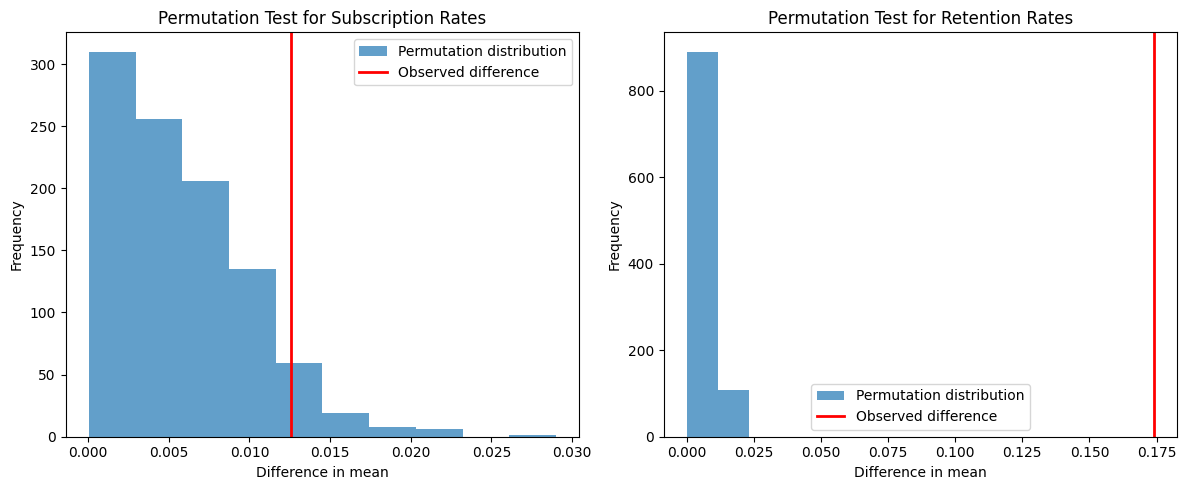

P-value for subscription rates: 0.071
P-value for retention rates: 0.0


In [124]:


def permutation_test(subscription, retention, num_permutations=1000):
    """
    Perform a permutation test for the difference in proportions.

    Parameters:
    subscription : array_like
        Data points from group 1.
    retention : array_like
        Data points from group 2.
    num_permutations : int
        Number of permutations to perform.

    Returns:
    p-value : float
        The p-value of observing a difference as extreme as the actual difference.
    """
    # Combine all data points
    all_data = np.concatenate([subscription, retention])
    size = subscription.size
    observed_diff = np.abs(subscription.mean() - retention.mean())

    # Generate permutations
    perm_diffs = []
    for _ in range(num_permutations):
        np.random.shuffle(all_data)
        new_group1 = all_data[:size]
        new_group2 = all_data[size:]
        perm_diffs.append(np.abs(new_group1.mean() - new_group2.mean()))

    # Compute p-value
    p_value = np.mean(perm_diffs >= observed_diff)
    return p_value, perm_diffs, observed_diff

# Data arrays for New and Old UX designs
# Subscription Yes responses
sub_new = np.array([1]*5298 + [0]*5465)
sub_old = np.array([1]*4980 + [0]*4885)

# Retention Yes responses
ret_new = np.array([1]*4438 + [0]*6325)
ret_old = np.array([1]*5784 + [0]*4081)

# Perform permutation tests
p_subscription, perm_subs, obs_sub = permutation_test(sub_new, sub_old)
p_retention, perm_rets, obs_ret = permutation_test(ret_new, ret_old)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subscription plot
axes[0].hist(perm_subs, bins=10, alpha=0.7, label='Permutation distribution')
axes[0].axvline(obs_sub, color='red', linewidth=2, label='Observed difference')
axes[0].set_title('Permutation Test for Subscription Rates')
axes[0].set_xlabel('Difference in mean')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Retention plot
axes[1].hist(perm_rets, bins=2, alpha=0.7, label='Permutation distribution')
axes[1].axvline(obs_ret, color='red', linewidth=2, label='Observed difference')
axes[1].set_title('Permutation Test for Retention Rates')
axes[1].set_xlabel('Difference in mean')
axes[1].set_ylabel('Frequency')
axes[1].legend()
plt.tight_layout()
plt.show()

# Print p-values
print("P-value for subscription rates:", p_subscription)
print("P-value for retention rates:", p_retention)


# **Result**

**Subscription Rates**
P-value: The reported p-value is 0.071, which is above the standard threshold of 0.05 for statistical significance. This suggests that the observed difference in subscription rates between the new and old designs could be due to chance. The new design does not appear to significantly alter the likelihood of users subscribing compared to the old design.

**Retention Rates**
P-value: The reported p-value is 0.0, which is well below the threshold of 0.05, indicating that the difference in retention rates is highly statistically significant. This suggests that users are more likely to continue using our service beyond the initial sign-up period when interacting with the new UX design.

From all the above findings, It is recommend deploying the new UX design with a focus on the long-term engagement and retention of  user base. The significant improvement in retention rates can lead to increased lifetime value per user and is indicative of a better overall user experience.

To conclude, the data analysis result underscores the strategic importance of retention, an area where the new design excels. Based on the results, deploying the new design is not only advisable but also strategically sound, primarily due to its substantial impact on retention rates, a critical metric for long-term business success.